### Importação de Bibliotieca

In [ ]:
import pandas as pd

### Análise dos dados

In [ ]:
#Leitura de onde os dados estão
df = pd.read_csv('/content/drive/MyDrive/dataset_avaliacoes.csv')
#Exibindo os 5 primeiros registros
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [ ]:
df.shape

(15501, 4)

In [ ]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

## **2.0 Transformando Textos em dados numéricos** :

### 2.1 "Bag of Words" : Basicamente seria pegar todas as palavras que a gente tem no nosso conjunto de dados e calcular qual é a frequência delas em cada uma das avaliações que nós temos. Ai no caso teriamos um vector uma matriz com esses dados que aparecem com mais frequência

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Responsavel por fazer essa parte do "Bag of Words"

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vetorizar = CountVectorizer ()

bag_of_words = vetorizar.fit_transform(texto)


In [ ]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [ ]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [ ]:
vetorizar = CountVectorizer(lowercase=False,max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

#

(15501, 50)


In [ ]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words,df.sentimento,random_state=4978)

### Modelo de classificação

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino,y_treino)

acuracia = regressao_logistica.score(X_teste,y_teste)
print(acuracia)

0.7982456140350878


### World Cloud : Nuvem de palavras em Python lib onde quanto maior for a frequência da palavra maior ela aparece

In [ ]:
from wordcloud import WordCloud



In [ ]:
todas_palavras = [texto for texto in df.avaliacao]



In [ ]:
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [ ]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])

### Unico texto contendo tudo

In [ ]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

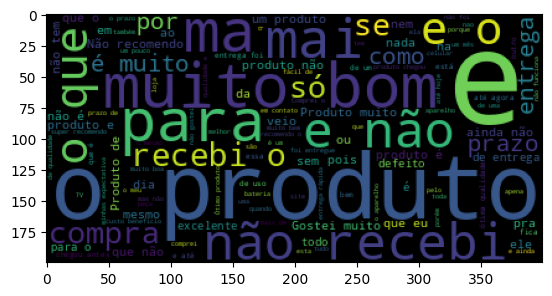

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)


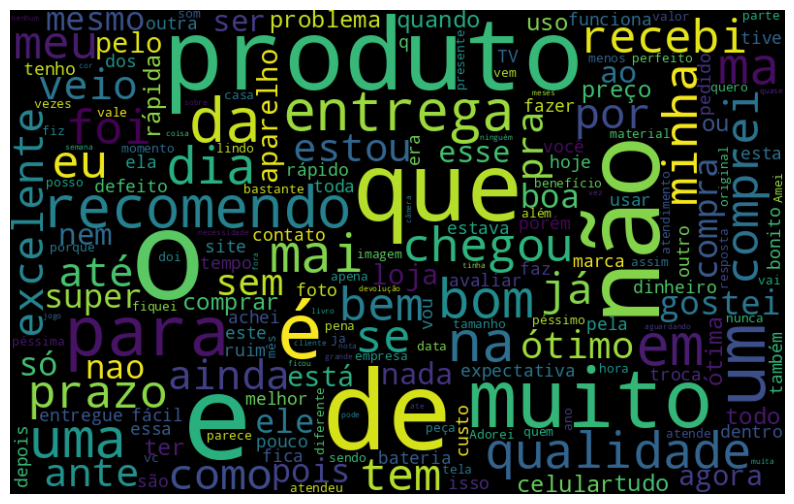

In [ ]:
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=130,collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,10))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis('off')
plt.show()

### Filtrando  por sentimento

In [ ]:
def nuvem_palavras (texto,coluna_texto,sentimento):
  #Aqui nos separamos as avaliações pelo sentimetno
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  #Depois precisamos unir em um texto corrido novamente:

  texto_unido = ' '.join(texto_sentimento)
  nuvem_palavras = WordCloud(width=800,height=500,max_font_size=130,collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,10))
  plt.imshow(nuvem_palavras,interpolation='bilinear')
  plt.axis('off')
  plt.show()

### **Nuvem de Palavras negativa**

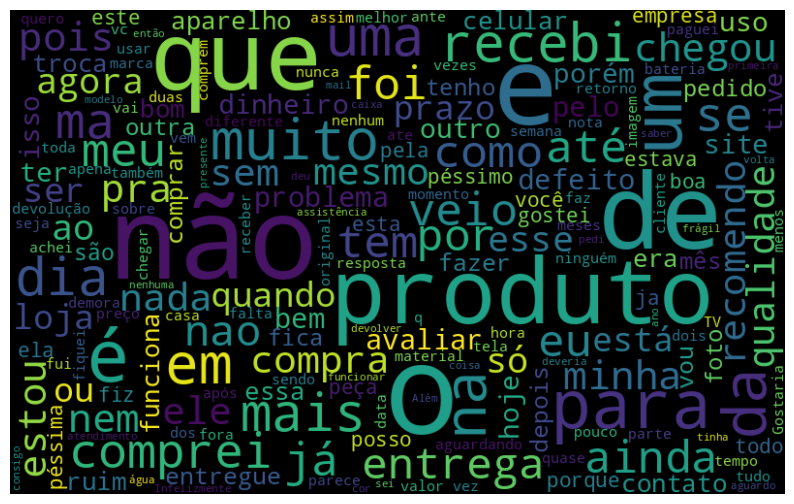

In [ ]:
nuvem_palavras(df,'avaliacao','negativo')

### **Nuvem de Palavras Positiva**

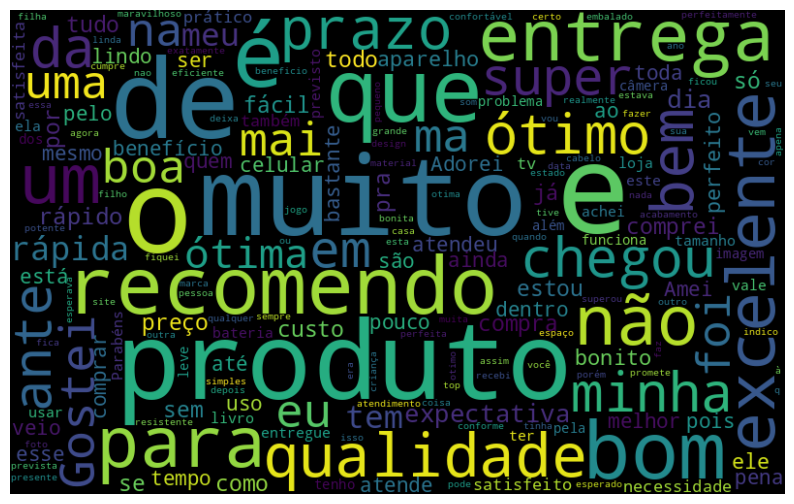

In [ ]:
nuvem_palavras(df,'avaliacao','positivo')

### Tokenizando o texto:

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
frases = ['um produto bom','um produto ruim']

In [ ]:
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [ ]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida !'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida', '!']


### Frequencia de Palavras:

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)

### Todas as palavras do df sendo tokenizadas

In [ ]:
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [ ]:
print(token_frase)

['Esse', 'smartphone', 'superou', 'minhas', 'expectativas,', 'recomendo', 'o', 'cheiro', 'e', 'muito', 'desagradavel!!', 'pra', 'quem', 'se', 'incomoda', 'nao', 'recomendoo..', 'Eu', 'fiz', 'a', 'compra', 'a', 'loja', 'não', 'entregou', 'o', 'produto,', 'a', 'compra', 'foi', 'feita', 'no', 'cartão', 'de', 'credito', 'e', 'ate', 'o', 'momento', 'a', 'loja', 'também', 'nao', 'me', 'devolveu', 'o', 'valor', 'da', 'compra.', 'Atendeu', 'minhas', 'expectativas,', 'só', 'achei', 'a', 'luz', 'ruim,', 'mas', 'nada', 'que', 'dificulte', 'seu', 'funcionamento.', 'Gostei', 'muito,', 'só', 'achei', 'que', 'ficou', 'a', 'desejar', 'a', 'qualidade', 'das', 'fotos.', 'Achei', 'que', 'fosse', 'bem', 'melhor', '.', 'Comprei', 'o', 'produto', 'e', 'ñ', 'tinha', 'para', 'entrega', 'isso', 'não', 'foi', 'legal!!!!!!', 'o', 'produto', 'pode', 'até', 'ser', 'bom', ',mais', 'só', 'posso', 'avalia-lo', 'depois', 'que', 'for', 'feito', 'a', 'troca', 'para', 'eu', 'usa-lo,', 'pois', 'estou', 'esperando', 'a', '

In [ ]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [ ]:
df_frequencia = pd.DataFrame({'Palavras':list(frequencia.keys()),
                              'Frequencia':list(frequencia.values())})

In [ ]:
df_frequencia.head()

Palavras  Frequencia
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

### Resultado das 10 palavras mais frequentes

In [ ]:
df_frequencia.nlargest(columns='Frequencia',n=10)

Palavras  Frequencia
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

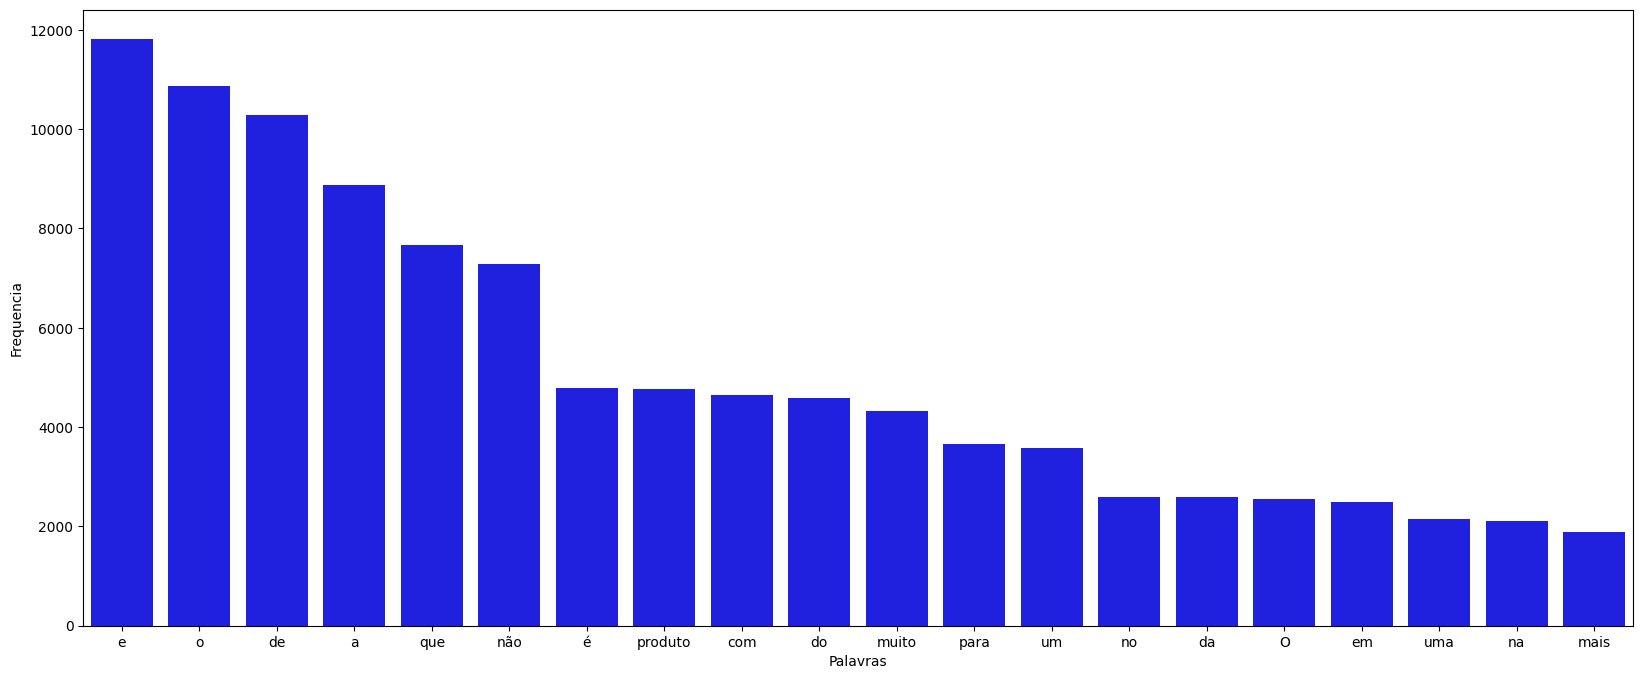

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia',n=20),x='Palavras',y='Frequencia',color = 'blue')
ax.set(ylabel='Frequencia')
plt.show()

### Removendo Stopwords

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [ ]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
frase_processada = []

for opniao in df.avaliacao:
  palavras_texto = token_espaco.tokenize(opniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))


  #Nova coluna removendo as stopwords
df['tratamento_1'] = frase_processada


In [ ]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [ ]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [ ]:
df['tratamento_1'] [0]

'Esse smartphone superou expectativas, recomendo'

In [ ]:
def classificar_texto (texto,coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(lowercase=False,max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words,texto[coluna_sentimento],random_state=4978)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(X_treino,y_treino)
  acuracia = regressao_logistica.score(X_teste,y_teste)
  return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100 :.2f}%")

### Apenas removendo as stopwords o quanto de acurácia mudou

In [ ]:
classificar_texto(df,'tratamento_1','sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


In [ ]:
def grafico_frequencia (texto,coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
  df_frequencia = pd.DataFrame({'Palavras':list(frequencia.keys()),
                              'Frequencia':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns='Frequencia',n=quantidade)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(data=df_frequencia,x='Palavras',y='Frequencia',color = 'blue')
  ax.set(ylabel='Frequencia')
  plt.show()

### Removendo Pontuação

In [ ]:
frase = 'Esse smartphone superou expectativas,recomendo'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)
#

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [ ]:
frase_processada = []

for opniao in  df['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [ ]:
df.head(  )

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [ ]:
df['tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

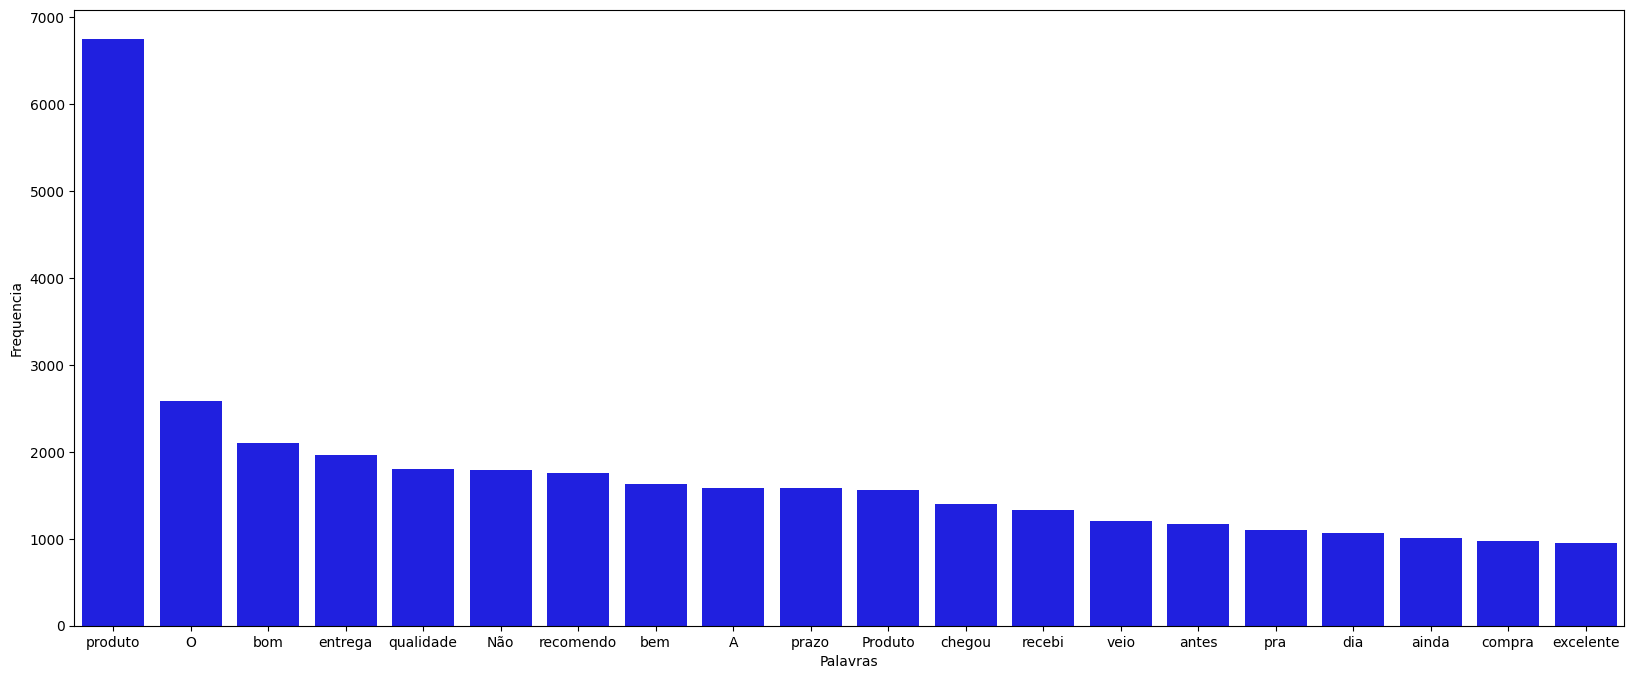

In [ ]:
grafico_frequencia(df,'tratamento_2',20)

### Removendo Acentuação

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
import unidecode

frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
print(teste)
#

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [ ]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [ ]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opniao in df['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in stopwords_sem_acentos]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada
#

In [ ]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
df['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [ ]:
df['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

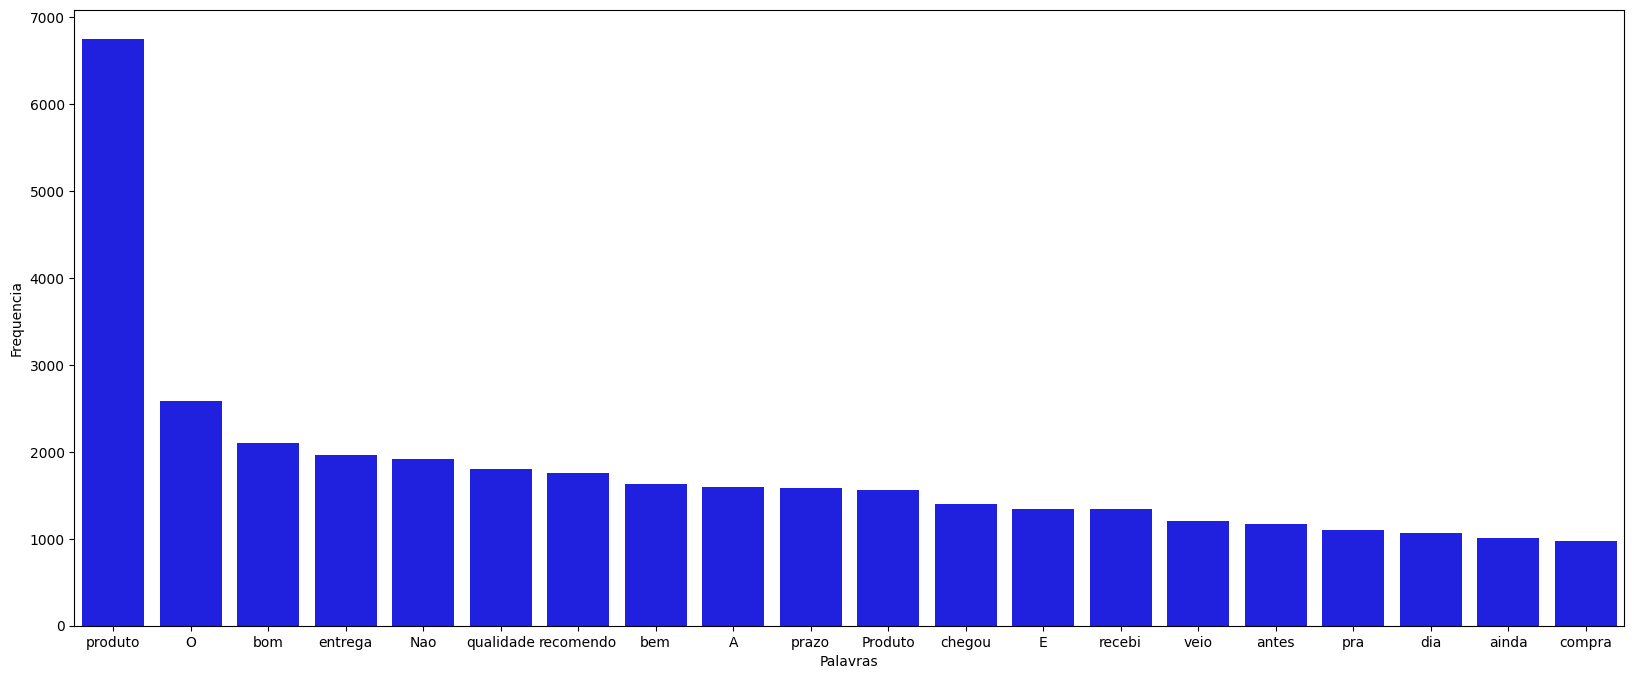

In [ ]:
grafico_frequencia(df,'tratamento_3',20)